## SVM - Support Vector Machine

---
**Support Vector Networks**

https://en.wikipedia.org/wiki/Support_vector_machine

**Large Margin Classifier**

The Support Vector Machine (SVM) is yet another type of supervised machine learning algorithm. It is sometimes cleaner and more powerful.

In machine learning, support vector machines (SVMs, also support vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. 

Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier. 

SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall on.
 
In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

When data are not labeled, supervised learning is not possible, and an unsupervised learning approach is required, which attempts to find natural clustering of the data to groups, and then map new data to these formed groups. The clustering algorithm which provides an improvement to the support vector machines is called support vector clustering and is often used in industrial applications either when data are not labeled or when only some data are labeled as a preprocessing for a classification pass.

SVM is kernel method, i.e. it only depends on data through dot products.

The kernel function computes a dot product in a different high dimensional space.

1. Ability to generate non linear decision boundaries
2. no fixed dimensional feature space representation

---
Kernel 
---

In machine learning, kernel methods are a class of algorithms for pattern analysis, whose best known member is the support vector machine (SVM).


**Radial basis function kernel**


In machine learning, the (Gaussian) radial basis function kernel, or RBF kernel, is a popular kernel function used in various kernelized learning algorithms. In particular, it is commonly used in support vector machine classification.

Kernel methods owe their name to the use of kernel functions, which enable them to operate in a high-dimensional, implicit feature space without ever computing the coordinates of the data in that space, but rather by simply computing the inner products between the images of all pairs of data in the feature space. This operation is often computationally cheaper than the explicit computation of the coordinates. This approach is called the "kernel trick". Kernel functions have been introduced for sequence data, graphs, text, images, as well as vectors.

Algorithms capable of operating with kernels include the kernel perceptron, support vector machines (SVM), Gaussian processes, principal components analysis (PCA), canonical correlation analysis, ridge regression, spectral clustering, linear adaptive filters and many others. Any linear model can be turned into a non-linear model by applying the kernel trick to the model: replacing its features (predictors) by a kernel function.

Most kernel algorithms are based on convex optimization or eigenproblems and are statistically well-founded. Typically, their statistical properties are analyzed using statistical learning theory (for example, using Rademacher complexity).

The RBF kernel on two samples x and x', represented as feature vectors in some input space, is defined as

$K(\mathbf {x} ,\mathbf {x'} )=\exp \left(-{\frac {||\mathbf {x} -\mathbf {x'} ||^{2}}{2\sigma ^{2}}}\right)$

$\textstyle ||\mathbf {x} -\mathbf {x'} ||^{2}$ may be recognized as the squared Euclidean distance between the two feature vectors. $\sigma$ is a free parameter. An equivalent, but simpler, definition involves a parameter $\textstyle \gamma ={\tfrac {1}{2\sigma ^{2}}}:$

$ K(\mathbf {x} ,\mathbf {x'} )=\exp(-\gamma ||\mathbf {x} -\mathbf {x'} ||^{2})$

Since the value of the RBF kernel decreases with distance and ranges between zero (in the limit) and one (when $x = x'$), it has a ready interpretation as a similarity measure.[2] The feature space of the kernel has an infinite number of dimensions; for $ \sigma =1$, its expansion is:

$\exp \left(-{\frac {1}{2}}||\mathbf {x} -\mathbf {x'} ||^{2}\right)=\sum _{j=0}^{\infty }{\frac {(\mathbf {x} ^{\top }\mathbf {x'} )^{j}}{j!}}\exp \left(-{\frac {1}{2}}||\mathbf {x} ||^{2}\right)\exp \left(-{\frac {1}{2}}||\mathbf {x'} ||^{2}\right) $


Convex minimization, a subfield of optimization, studies the problem of minimizing convex functions over convex sets. The convexity property can make optimization in some sense "easier" than the general case - for example, any local minimum must be a global minimum.



---
What are we going to do if we have less structured data: text, images, molecular structure?

One approach is to blow apart your feature space and encode every possible value by a new column: i.e. for text each possible word in your corpus (can be tens of thousands) will be a column.  What problems will we encounter?

* Kernels
* Sparse encodings (bag of words)
* Order often gets destroyed
* Computational can be intractable

---
**Similarities ~ Kernels:**

* Mercer Kernels
* Feature Expansion
* Linear
* Polynomial
* RBF
* Other: String Kernel

---

... de lo mejor :

https://www.youtube.com/watch?v=3liCbRZPrZA

---

**Maximal Margin Classifier**


In [127]:
from __future__ import division

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.datasets import load_digits

from matplotlib import pylab as plt

import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn.metrics
import itertools

plt.rcParams['figure.figsize'] = (12.0, 4.0)


% matplotlib notebook
% matplotlib inline
% autoreload 2

In [ ]:
from sklearn.svm import LinearSVC

In [211]:
df = pd.read_csv('data/data_scientist.csv')

In [212]:
df[:2]

,email_hours,gym_hours,data_scientist
0,18.995746,6.879446,1
1,19.178514,5.954391,1


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
email_hours       20 non-null float64
gym_hours         20 non-null float64
data_scientist    20 non-null int64
dtypes: float64(2), int64(1)
memory usage: 552.0 bytes


In [214]:
y = df.pop('data_scientist').values
y[:2]

array([1, 1])

In [215]:
feature_names = df.columns
feature_names[0]

'email_hours'

In [216]:
X = df.values
X[:2]

array([[ 18.99574642,   6.87944627],
       [ 19.17851406,   5.95439109]])

In [258]:
def plot_df(X, y, feat_names):
    plt.figure(figsize=(14, 6))
    plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5, cmap='RdBu', s=80)
    plt.xlabel(feat_names[0])
    plt.ylabel(feat_names[1])
    plt.colorbar()
    

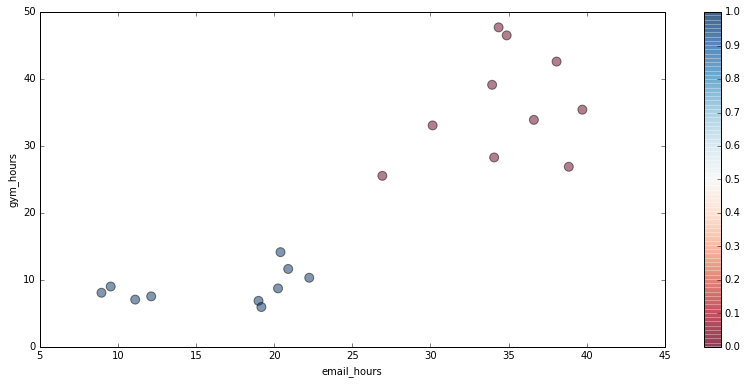

In [259]:
plot_df(X, y, feature_names)

---
Logistic Regression Boundary
---

Logistic Regression is similar to the Support Vector Machine, except Logistic Regression minimizes logistic loss and does not explicitly maximize the margin.


In [260]:
model = LogisticRegression(intercept_scaling=100)
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=100, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**Logistic regression:**

$\beta_0 + \beta_1{x_1} + \beta_2{x_2} = 0$ 

In [261]:
beta_1, beta_2 = model.coef_.tolist()[0] # [0] : Removes a braket
beta_0 = model.intercept_
beta_0

array([ 15.41813064])

In [262]:
x1 = X[:, 0]
x2 = X[:, 1]
x1

array([ 18.99574642,  19.17851406,  20.89560347,  22.24233716,
        38.85416128,  34.07837044,  12.12672866,  38.0721481 ,
        34.36346315,  20.40249899,  26.92177218,  34.87831282,
         8.94328296,  11.10176919,   9.53415464,  33.94732331,
        20.2451104 ,  39.72320565,  36.61957253,  30.13952291])

In [263]:
x_range = min(x1), max(x1)
x_range

(8.9432829568082148, 39.723205652514856)

In [269]:
# θ is always at 90 degrees to the decision boundary
y_decision_boundary = (beta_0 + beta_1*np.array(x_range))  / (-1*beta_2)
y_decision_boundary

array([ 27.48339013,  12.4195219 ])

In [265]:
beta_magnitud = np.sqrt(np.sum(model.coef_**2))
beta_magnitud

0.53877630487596539

In [266]:
# The distance from eachpoint to the decision boundery 
dist_points= np.abs(beta_0 + np.dot(model.coef_, X.T)) / beta_magnitud
dist_points

array([[ 14.08757647,  14.83812022,   8.97739534,   9.56709749,
         12.62415167,  11.77530506,  16.51010399,  26.39202567,
         29.3471823 ,   6.94069313,   6.16341445,  28.5002534 ,
         17.42413591,  17.39163074,  16.3285155 ,  21.46195215,
         11.87393111,  20.66746976,  17.93367967,  14.34224527]])

In [284]:
def plot_decision_boundary(X, y, feat_names, x_range, y_decision_boundary, dist_points):
    plt.figure(figsize=(14, 6))
    plt.scatter(X[:,0], X[:,1], c=y, alpha=0.35, cmap='RdBu', s=dist_points*100)
    plt.xlabel(feat_names[0])
    plt.ylabel(feat_names[1])
    plt.plot(x_range, y_decision_boundary, 'k-')
    plt.colorbar()
    
    

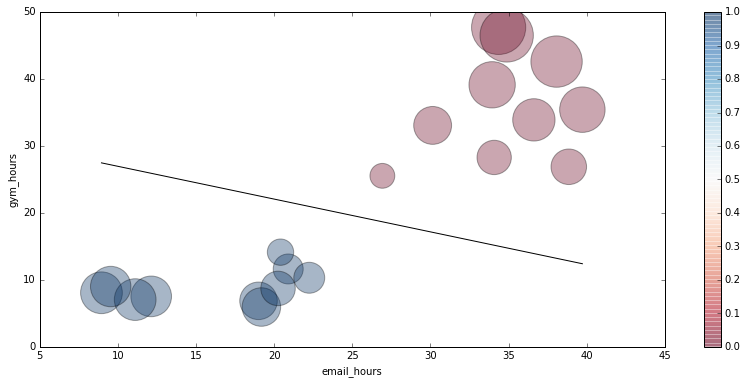

In [285]:
plot_decision_boundary(X, y, feature_names, x_range, y_decision_boundary, dist_points )

---
Support Vector Machine Boundary
---

In [271]:
svm_model = LinearSVC(intercept_scaling=100)
svm_model.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=100, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

**Separating hyperplane**

In [272]:
w1, w2 = svm_model.coef_[0]
w

array([-0.0711069 , -0.13365894])

In [273]:
w0 = svm_model.intercept_[0]
w0

4.3350204426827217

In [274]:
d = -w1 / w2

In [275]:
# SVM_y_decision_boundary
ydb = d*np.array(x_range) - w0 / w2
ydb

array([ 27.67537197,  11.30037504])

**Parallels separating the hyperplane that pass through the support vectors**

In [276]:
margin = 1 / np.sqrt(np.sum(svm_model.coef_**2))

In [277]:
yy_l = ydb - d * margin
yy_u = ydb + d * margin

In [278]:
def plot_svm_decision_boundary(X, y, feat_names, x_range, y_decision_boundary,  yy_l, yy_u):
    plt.figure(figsize=(14, 6))
    plt.scatter(X[:,0], X[:,1], c=y, alpha=0.3, cmap='RdBu', s=80)
    plt.xlabel(feat_names[0])
    plt.ylabel(feat_names[1])
    plt.plot(x_range, ydb)
    plt.plot(x_range, yy_l, 'k-')
    plt.plot(x_range, yy_u, 'k-')
    plt.colorbar()
    

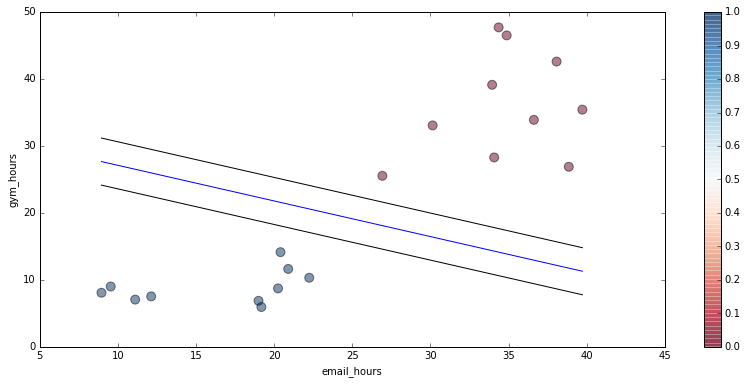

In [279]:
plot_svm_decision_boundary(X, y, feature_names,x_range, ydb, yy_l, yy_u)